# Classify MNIST and Traffic Signs with Scikit-Learn

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# from sklearn.datasets import fetch_mldata
import numpy as np
import pandas as pd
import numpy.random
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random
from mnist import MNIST

In [ ]:
# mnist = fetch_mldata('MNIST original')

MNIST handwritten digit dataset: http://yann.lecun.com/exdb/mnist/

In [4]:
# X_mnist, y_mnist = mnist['data'], mnist['target']
def load_mnist():
    mndata = MNIST('MNIST_data')
    train_images, train_labels = mndata.load_training()
    test_images, test_labels = mndata.load_testing()
    return np.concatenate((train_images, test_images)), np.concatenate((train_labels, test_labels))

X_mnist, y_mnist = load_mnist()

In [5]:
X_mnist.shape, X_mnist.shape

((70000, 784), (70000, 784))

0
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   

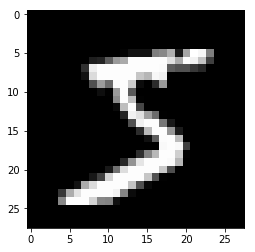

In [6]:
np.set_printoptions(threshold=1000, linewidth=10000)

def display(X, y, n):
    pic = X[n].reshape(28, 28)
    plt.imshow(pic, cmap='gray')
    with pd.option_context("display.max_columns", 1000):
        print(n)
        print(y[n])
        print(pic)
    
n = numpy.random.randint(0, X_mnist.shape[0])
display(X_mnist, y_mnist, 0)

In [7]:
shuffle_index = np.random.permutation(X_mnist.shape[0])
shuffle_index

array([43162, 52407, 59579, ..., 35339, 40069, 12871])

In [8]:
X_mnist, y_mnist = X_mnist[shuffle_index], y_mnist[shuffle_index]

### Split the MNIST dataset into train and test

In [9]:
split_n = 60000
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test \
    = X_mnist[:split_n], X_mnist[split_n:], y_mnist[:split_n], y_mnist[split_n:]

### Use a Classifier from Scikit

In [10]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [11]:
# %time cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='accuracy')

In [12]:
# %time cross_val_score(LogisticRegression(), X, y, cv=3, scoring='accuracy')

In [13]:
# cross_val_score(GradientBoostingClassifier(), X, y, cv=3, scoring='accuracy')

Let's take a look at a particular prediction:

In [14]:
# clf = LogisticRegression(solver='sag', max_iter=1000)
# %time _ = clf.fit(X_mnist_train, y_mnist_train)

In [15]:
clf = RandomForestClassifier()
%time _ = clf.fit(X_mnist_train, y_mnist_train)

CPU times: user 4.35 s, sys: 135 ms, total: 4.48 s
Wall time: 4.5 s


**The classifier achieves high accuracy on MNIST dataset:**

In [16]:
accuracy_score(y_mnist_test, clf.predict(X_mnist_test))

0.95040000000000002

('Prediction:', array([3]))
2569
3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 103 185 254 255 254 212 254 254 254 237 150  48   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 112 251 253 253 253 253 253 253 253 253 253 253 247 136   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 169 252 253 253 253 221 217 172 134 217 217 245 253 251 125   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 210 158  67  67   8

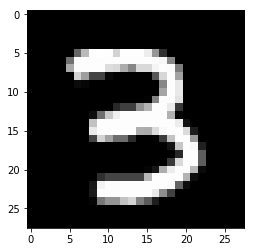

In [20]:
def display_letter_predict():
    i = random.randint(0, X_mnist_test.shape[0])
    print('Prediction:', clf.predict([X_mnist_test[i]]))
    display(X_mnist_test, y_mnist_test, i)

display_letter_predict()

# Traffic Sign Recogntion With A Basic Classifier

## Load Data

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

Load traffic sign data:

In [1]:
import pickle

def load_traffic_signs():
    traffic_dir = 'traffic_signs_data'

    with open(traffic_dir + '/train2.p', mode='rb') as f:
        train = pickle.load(f)
    with open(traffic_dir + '/test2.p', mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['images'], train['labels']
    X_test, y_test = test['images'], test['labels']
    return X_train, y_train, X_test, y_test

Check the sizes and shapes of the data:

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((39209, 32, 32, 3), (39209,), (12630, 32, 32, 3), (12630,))

In [33]:
def read_sign_names():
    with open(traffic_dir + '/signnames.csv', 'rt') as f:
        reader = csv.reader(f)
        reader.next() # Skip the header
        return {int(r[0]): r[1] for r in reader}
    
def test_image(test_set, test_labels, class_names):
    for index in random.sample(range(len(test_set)), 5):
        image = test_set[index].squeeze()
        cls_name = class_names[test_labels[index]]
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.figtext(0, 0, cls_name)
#         return image

Display a few signs and their labels:

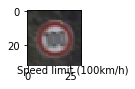

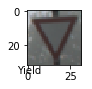

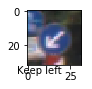

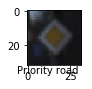

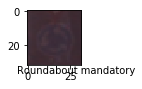

In [34]:
class_names = read_sign_names()
test_image(X_train, y_train, class_names)

In [36]:
x = X_train[random.randint(0, X_train.shape[0])]
np.set_printoptions(threshold=numpy.nan)

In [37]:
# def normalize(image_data, min_x=None, max_x=None):
#     """ 
#     Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
#     :param image_data: The image data to be normalized
#     :return: Normalized image data
#     """
#     # TODO: Implement Min-Max scaling for grayscale image data
#     min_x = np.min(image_data) if min_x is None else min_x
#     max_x = np.max(image_data) if max_x is None else max_x
#     a, b = 0.1, 0.9
#     result = a + (image_data - min_x) * (b - a) / (max_x - min_x)
#     return result, min_x, max_x

# X_train_norm, min_x, max_x = normalize(X_train)
# X_valid_norm, _, _ = normalize(X_valid, min_x, max_x)
# X_test_norm, _, _ = normalize(X_test, min_x, max_x)

X_train_norm = X_train
X_test_norm = X_test

In [38]:
new_shape = (-1, 32 * 32, 3)
X_train_norm = X_train_norm.reshape(new_shape)
X_test_norm = X_test_norm.reshape(new_shape)

In [39]:
# def to_grayscale(arr):
#     assert arr.shape[0] == 3
#     return arr[0]*0.299 + arr[1]*0.587 + arr[2] * 0.114
weights = np.array([0.299, 0.587, 0.114])  # RGB -> GRAY

X_train_gray = np.average(X_train_norm, weights=weights.ravel(), axis=2)
X_test_gray = np.average(X_test_norm, weights=weights.ravel(), axis=2)

In [41]:
X = X_train_gray
y = y_train

Train the classifier and check the prediction accuracy:

In [43]:
rf = RandomForestClassifier(oob_score=True)
%time rf.fit(X_train_gray, y_train)
print('Train: ', rf.oob_score_)
print('Valid: ', accuracy_score(y_test, rf.predict(X_test_gray)))

CPU times: user 18.9 s, sys: 420 ms, total: 19.4 s
Wall time: 19.5 s
('Train: ', 0.79071131627942559)
('Valid: ', 0.64742676167854318)


Check a single prediction:

In [45]:
def show_pred(clf, X, y, X_color):
    i = random.randint(0, X.shape[0])
    index = clf.predict([X[i]])[0]
    print('Prediction:', class_names[index])
    print('Fact:', class_names[y[i]])
    plt.figure(0)
    plt.imshow(X[i].reshape(32, 32), cmap='gray')
    plt.figure(1)
    plt.imshow(X_color[i])

('Prediction:', 'No passing for vehicles over 3.5 metric tons')
('Fact:', 'Ahead only')


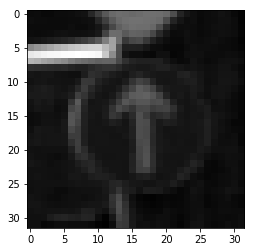

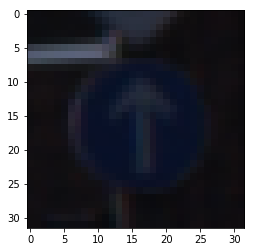

In [49]:
show_pred(rf, X_test_gray, y_test, X_test)